In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [10]:
#reading the data from the link 
url = "http://bit.ly/w-data"
stu_data = pd.read_csv(url)
print("Data has been imported succesful")

stu_data.head(10)



Data has been imported succesful


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [11]:
#Check if there is any null value in the Dataset
stu_data.isnull == True

False

Since there is no null value in the Dataset, we can now visualize our Data.

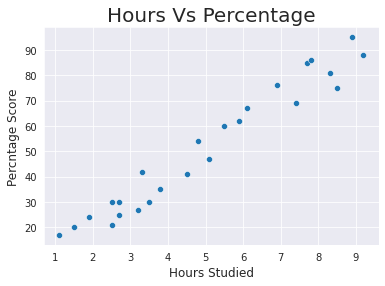

In [13]:

sns.set_style('darkgrid')
sns.scatterplot(y= stu_data['Scores'], x= stu_data['Hours'])
plt.title('Hours Vs Percentage',size=20)
plt.xlabel('Hours Studied', size=12)
plt.ylabel('Percntage Score', size=12)
plt.show()

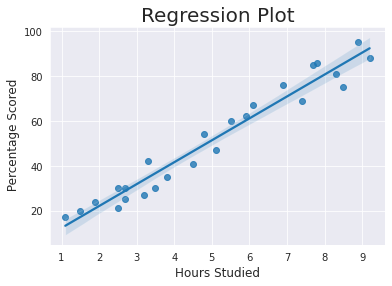

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [17]:
sns.regplot(x= stu_data['Hours'], y= stu_data['Scores'])
plt.title('Regression Plot',size=20)
plt.xlabel('Hours Studied', size=12)
plt.ylabel(' Percentage Scored', size=12)
plt.show()
print(stu_data.corr())

The variables are positively correlated 

**Training the model**

1. Preparing the Data



In [22]:
x = stu_data.iloc[:, :-1].values
y = stu_data.iloc[:, 1].values

#iloc helps us to select a specific row/column from the dataset
# Spliting the Data in two
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state = 0)

2. Fitting the Data into the model

In [24]:
regression = LinearRegression()
regression.fit(train_x, train_y)
print("---------Model Trained---------")

---------Model Trained---------


 **Making Predictions**

In [27]:
print(train_x) # Testing data - In Hours
y_pred = regression.predict(train_x) # Predicting the scores

[[7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]


In [29]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': train_y, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,86,79.477295
1,76,70.529785
2,17,12.868050
3,47,52.634764
4,85,78.483127
5,42,34.739743
6,81,84.448134
7,88,93.395645
8,67,62.576442
9,30,36.728078


**Evaluating the Model**

In [30]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502482


**What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?**

In [33]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


**According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.**